In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Cleaning

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#file path

file_path = '/content/drive/MyDrive/Data Analysis/Amazon Kindle Books Dataset 2023/kindle_data-v2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


From the data we can notice that few columns are not needed for the analysis so we are going to drop the off

In [ ]:
# Dropping not needed columns

columns_to_drop = ['asin', 'imgUrl', 'reviews', 'category_id', 'category_name', 'productURL']
df = data.drop(columns=columns_to_drop, axis=1)

print(df.head())

                                               title             author  \
0  Adult Children of Emotionally Immature Parents...  Lindsay C. Gibson   
1  From Strength to Strength: Finding Success, Ha...   Arthur C. Brooks   
2  Good Inside: A Guide to Becoming the Parent Yo...      Becky Kennedy   
3             Everything I Know About Love: A Memoir     Dolly Alderton   
4  The Seven Principles for Making Marriage Work:...       John Gottman   

                     soldBy  stars  price  isKindleUnlimited  isBestSeller  \
0   Amazon.com Services LLC    4.8   9.99              False          True   
1   Penguin Group (USA) LLC    4.4  16.99              False         False   
2  HarperCollins Publishers    4.8  16.99              False         False   
3  HarperCollins Publishers    4.2   9.95               True         False   
4          Random House LLC    4.7  13.99              False         False   

   isEditorsPick  isGoodReadsChoice publishedDate  
0          False            

Before proceeding further, let's review that data types

In [ ]:
df.dtypes

title                 object
author                object
soldBy                object
stars                float64
price                float64
isKindleUnlimited       bool
isBestSeller            bool
isEditorsPick           bool
isGoodReadsChoice       bool
publishedDate         object
dtype: object

In [ ]:
df.describe

<bound method NDFrame.describe of                                                     title             author  \
0       Adult Children of Emotionally Immature Parents...  Lindsay C. Gibson   
1       From Strength to Strength: Finding Success, Ha...   Arthur C. Brooks   
2       Good Inside: A Guide to Becoming the Parent Yo...      Becky Kennedy   
3                  Everything I Know About Love: A Memoir     Dolly Alderton   
4       The Seven Principles for Making Marriage Work:...       John Gottman   
...                                                   ...                ...   
133097                                      Anna Karenina        Leo Tolstoy   
133098  Scary Smart: Scary Smart: The Future of Artifi...          Mo Gawdat   
133099  The Count of Monte Cristo: The Original Unabri...    Alexandre Dumas   
133100                                      War And Peace        Leo Tolstoy   
133101                                Pride and Prejudice        Jane Austen   

     

We have 10 columns and over 130k rows of data

In [ ]:
df.isnull()

,title,author,soldBy,stars,price,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
133097,False,False,False,False,False,False,False,False,False,False
133098,False,False,False,False,False,False,False,False,False,False
133099,False,False,False,False,False,False,False,False,False,False
133100,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title              133102 non-null  object 
 1   author             132677 non-null  object 
 2   soldBy             123869 non-null  object 
 3   stars              133102 non-null  float64
 4   price              133102 non-null  float64
 5   isKindleUnlimited  133102 non-null  bool   
 6   isBestSeller       133102 non-null  bool   
 7   isEditorsPick      133102 non-null  bool   
 8   isGoodReadsChoice  133102 non-null  bool   
 9   publishedDate      84086 non-null   object 
dtypes: bool(4), float64(2), object(4)
memory usage: 6.6+ MB


This shows that out of 133102 only 84086 books have publishedDate and there are some missing values in author as well as soldBy

In [ ]:
#Changing publishedDate datatype to datetime

df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce')

#Handling missing values i.e., missing publishedDate by filling up with a placeholder

df['publishedDate'].fillna(method='ffill', inplace=True)

#Removing duplicates

df.drop_duplicates(subset='title', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131913 entries, 0 to 133099
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title              131913 non-null  object        
 1   author             131492 non-null  object        
 2   soldBy             123134 non-null  object        
 3   stars              131913 non-null  float64       
 4   price              131913 non-null  float64       
 5   isKindleUnlimited  131913 non-null  bool          
 6   isBestSeller       131913 non-null  bool          
 7   isEditorsPick      131913 non-null  bool          
 8   isGoodReadsChoice  131913 non-null  bool          
 9   publishedDate      131913 non-null  datetime64[ns]
dtypes: bool(4), datetime64[ns](1), float64(2), object(3)
memory usage: 7.5+ MB


In [ ]:
df.head()

,title,author,soldBy,stars,price,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate
0,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,9.99,False,True,False,False,2015-06-01
1,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,16.99,False,False,False,False,2022-02-15
2,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,16.99,False,False,True,False,2022-09-13
3,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.2,9.95,True,False,True,False,2020-02-25
4,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.7,13.99,False,False,False,False,2015-05-05


we still have some missing in the author and soldBy column, to deal with this we will impute values

In [ ]:
# Fill missing 'author' values with 'Unknown'

df['author'].fillna('Unknown', inplace=True)

# Fill missing 'author' values with 'Various Sellers'

df['soldBy'].fillna('Various Sellers', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131913 entries, 0 to 133099
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title              131913 non-null  object        
 1   author             131913 non-null  object        
 2   soldBy             131913 non-null  object        
 3   stars              131913 non-null  float64       
 4   price              131913 non-null  float64       
 5   isKindleUnlimited  131913 non-null  bool          
 6   isBestSeller       131913 non-null  bool          
 7   isEditorsPick      131913 non-null  bool          
 8   isGoodReadsChoice  131913 non-null  bool          
 9   publishedDate      131913 non-null  datetime64[ns]
dtypes: bool(4), datetime64[ns](1), float64(2), object(3)
memory usage: 7.5+ MB


# Exploratory Data Analysis (EDA)

In [ ]:
import seaborn as sns

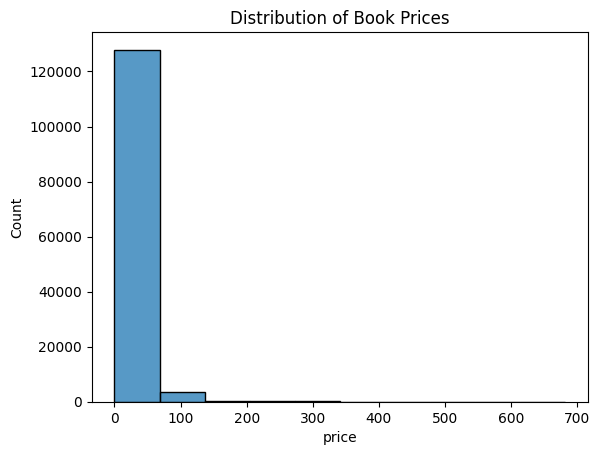

In [ ]:
#Distribution of Book Prices

sns.histplot(df['price'], bins=10)
plt.title('Distribution of Book Prices')
plt.show()

#Plot for Number of Books by Seller

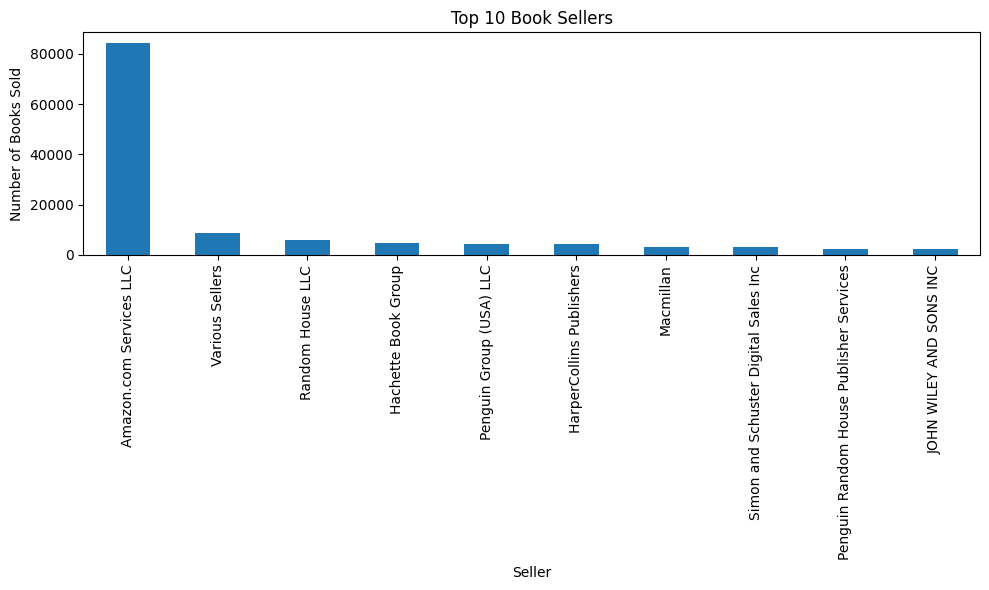

In [ ]:
plt.figure(figsize=(10,6))
df['soldBy'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Book Sellers')
plt.xlabel('Seller')
plt.ylabel('Number of Books Sold')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Visualization for Authors with Most Books

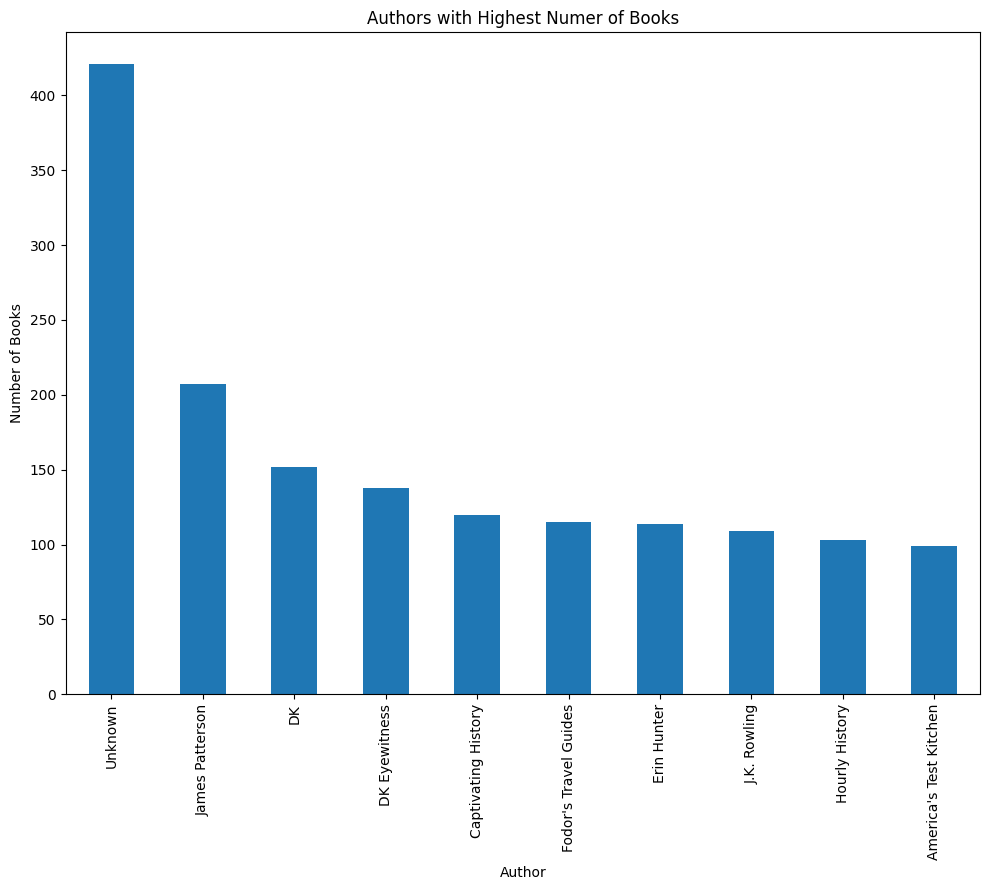

In [ ]:
plt.figure(figsize=(10,9))
df['author'].value_counts().head(10).plot(kind='bar')
plt.title('Authors with Highest Numer of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.tight_layout()
plt.show()

#Visualization for Distribution of Book Prices

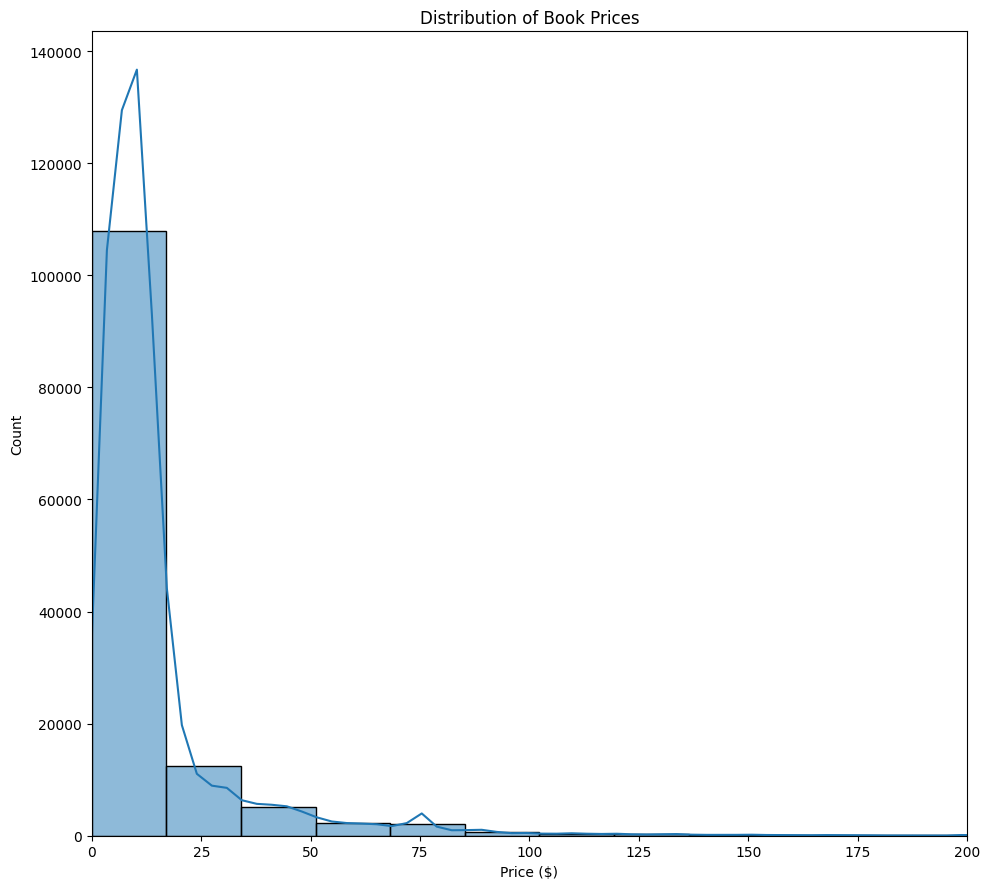

In [ ]:
plt.figure(figsize=(10,9))
sns.histplot(df[df['price'] <= 00]['price'], bins=40, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.xlim(0, 200)
plt.tight_layout()
plt.show()

In [ ]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])
df['month_year'] = df['publishedDate'].dt.to_period('M')

<Figure size 1400x700 with 0 Axes>

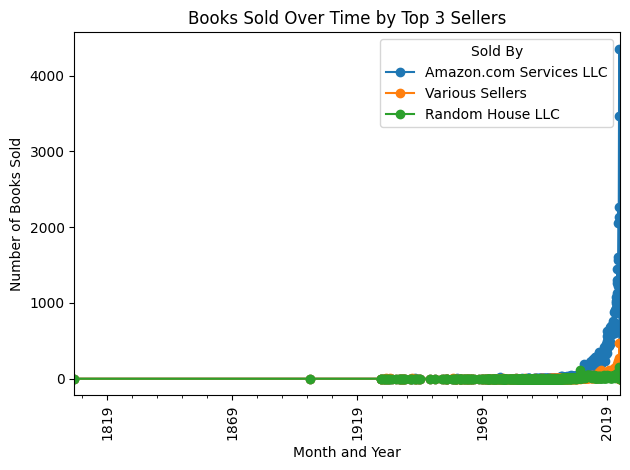

In [ ]:
time_series_data = df.groupby(['month_year', 'soldBy']).size().unstack(fill_value=0)

# Assuming you want to plot all sellers, this might be cluttered. For simplicity, let's plot the top 3 sellers.
# Identify the top 3 sellers based on overall book count
top_sellers = df['soldBy'].value_counts().nlargest(3).index

plt.figure(figsize=(14, 7))
time_series_data[top_sellers].plot(marker='o')
plt.title('Books Sold Over Time by Top 3 Sellers')
plt.xlabel('Month and Year')
plt.ylabel('Number of Books Sold')
plt.xticks(rotation=90)
plt.legend(title='Sold By')
plt.tight_layout()
plt.show()
